## Import Required Libraries

In [1]:
import sys
from pathlib import Path

try:
    import pandas as pd
    import matplotlib.pyplot as plt
except ImportError as e:
    print(f"Error: Required libraries not found: {e}")
    sys.exit(1)

print("✓ All libraries imported successfully")

✓ All libraries imported successfully


## Load the Data

In [2]:
def load_dataset(filepath: str) -> pd.DataFrame:
    path = Path(filepath)
    if not path.exists():
        raise FileNotFoundError(f"Dataset not found: {filepath}")
    return pd.read_csv(path)

try:
    train_df = load_dataset('../resources/Train_knight.csv')
    test_df = load_dataset('../resources/Test_knight.csv')
    print(f"✓ Train: {train_df.shape[0]} rows, Test: {test_df.shape[0]} rows")
except FileNotFoundError as e:
    print(f"✗ Error: {e}")
    sys.exit(1)

✓ Train: 398 rows, Test: 171 rows


## Create Scatter Plot Function

In [3]:
def create_scatter_plot(df: pd.DataFrame, x_col: str, y_col: str, title: str):
    """
    Create a scatter plot with points colored by knight class.
    """
    if 'knight' not in df.columns:
        raise ValueError("DataFrame must have 'knight' column")
    
    sith = df[df['knight'] == 'Sith']
    jedi = df[df['knight'] == 'Jedi']
    
    plt.figure(figsize=(10, 6))
    p1 = plt.scatter(jedi[x_col], jedi[y_col], alpha=0.6, label='Jedi', color='#3498db', s=30)
    p2 = plt.scatter(sith[x_col], sith[y_col], alpha=0.6, label='Sith', color='#e74c3c', s=30)
    
    plt.xlabel(x_col, fontsize=11)
    plt.ylabel(y_col, fontsize=11)
    plt.title(title, fontsize=14, fontweight='bold')
    plt.legend(handles=[p1, p2])
    plt.grid(alpha=0.3, linestyle='--')
    plt.tight_layout()
    plt.show()

def create_scatter_plot_unlabeled(df: pd.DataFrame, x_col: str, y_col: str, title: str):
    """
    Create a scatter plot for unlabeled data (single color).
    """
    plt.figure(figsize=(10, 6))
    plt.scatter(df[x_col], df[y_col], alpha=0.6, label='Knight', color='#7f8c8d', s=30)
    
    plt.xlabel(x_col, fontsize=11)
    plt.ylabel(y_col, fontsize=11)
    plt.title(title, fontsize=14, fontweight='bold')
    plt.legend()
    plt.grid(alpha=0.3, linestyle='--')
    plt.tight_layout()
    plt.show()

## Training Data: Separated Clusters
Using features with HIGH correlation (clusters should be visually separated)

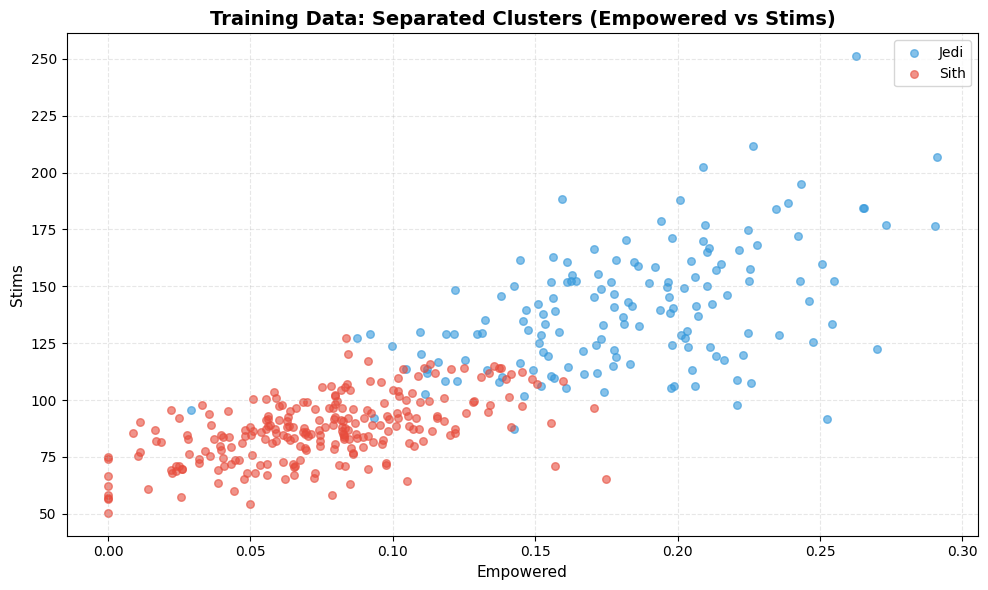

In [4]:
create_scatter_plot(train_df, 'Empowered', 'Stims', 'Training Data: Separated Clusters (Empowered vs Stims)')

## Training Data: Mixed Clusters
Using features with LOW correlation (clusters should overlap)

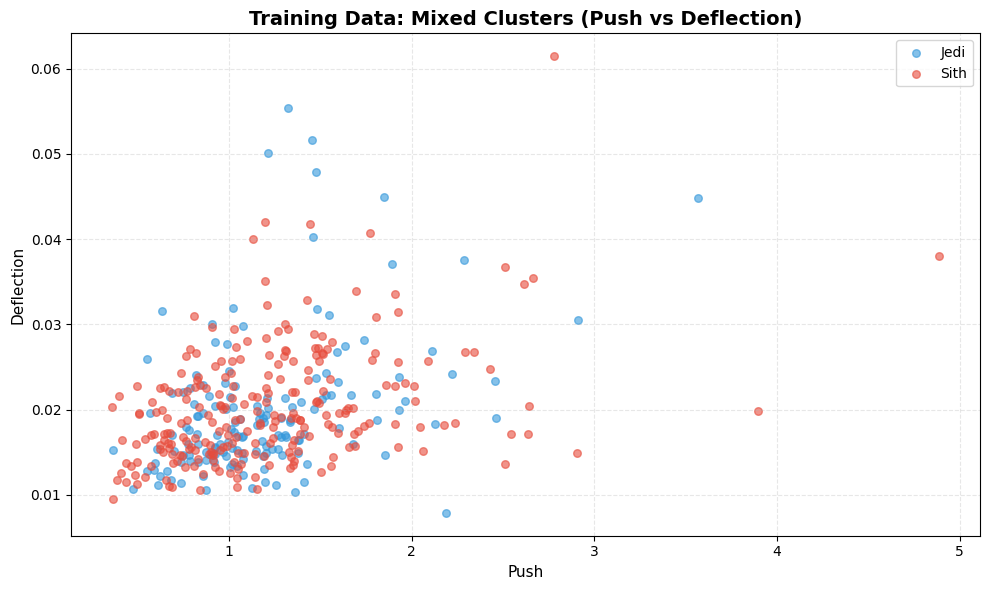

In [5]:
create_scatter_plot(train_df, 'Push', 'Deflection', 'Training Data: Mixed Clusters (Push vs Deflection)')

## Test Data: Separated Clusters

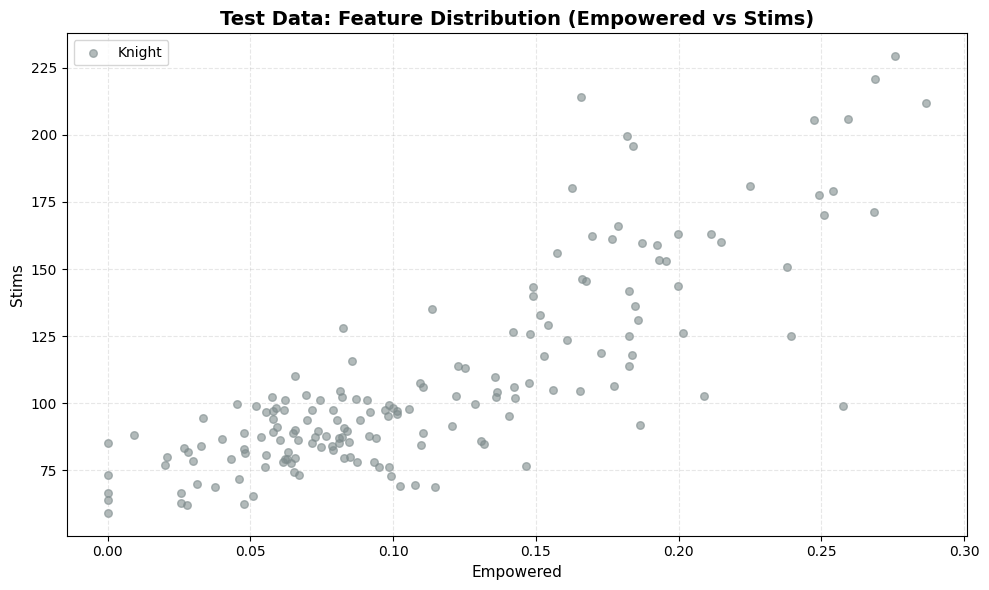

In [6]:
if 'knight' in test_df.columns:
    create_scatter_plot(test_df, 'Empowered', 'Stims', 'Test Data: Separated Clusters (Empowered vs Stims)')
else:
    create_scatter_plot_unlabeled(test_df, 'Empowered', 'Stims', 'Test Data: Feature Distribution (Empowered vs Stims)')

## Test Data: Mixed Clusters

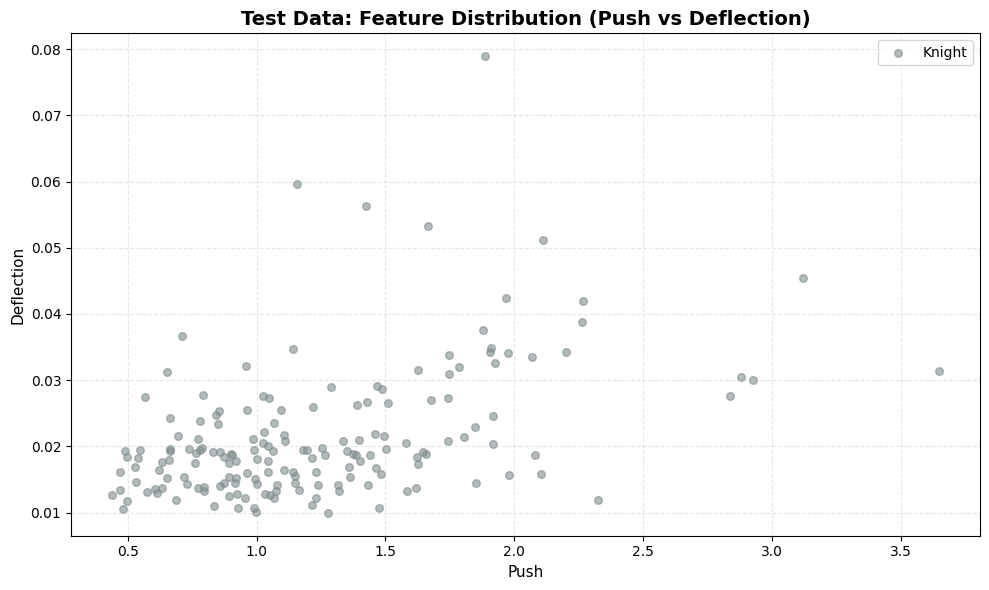

In [7]:
if 'knight' in test_df.columns:
    create_scatter_plot(test_df, 'Push', 'Deflection', 'Test Data: Mixed Clusters (Push vs Deflection)')
else:
    create_scatter_plot_unlabeled(test_df, 'Push', 'Deflection', 'Test Data: Feature Distribution (Push vs Deflection)')

## Summary

- Features with **high correlation** to target → Clusters separate well
- Features with **low correlation** to target → Clusters overlap (mixed)